In [1]:
from scipy.stats import chi2_contingency
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("..\\dataset\\metadata.csv")

In [5]:
print("The dataset has", df.shape[0], "rows and", df.shape[1], "columns.")

The dataset has 10015 rows and 6 columns.


In [6]:
df.head()

,image_id,lesion_type,confirmation,age,sex,localization
0,IMAGE_0000244,0,histo,80.0,male,scalp
1,IMAGE_0001916,0,histo,80.0,male,scalp
2,IMAGE_0006461,0,histo,80.0,male,scalp
3,IMAGE_0003197,0,histo,80.0,male,scalp
4,IMAGE_0009907,0,histo,75.0,male,ear


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   image_id      10015 non-null  object 
 1   lesion_type   10015 non-null  int64  
 2   confirmation  10015 non-null  object 
 3   age           9958 non-null   float64
 4   sex           10015 non-null  object 
 5   localization  10015 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 469.6+ KB


In [8]:
df.describe()

,lesion_type,age
count,10015.000000,9958.000000
mean,1.286271,51.863828
std,1.557828,16.968614
min,-1.000000,0.000000
25%,1.000000,40.000000
50%,1.000000,50.000000
75%,1.000000,65.000000
max,6.000000,85.000000


In [9]:
# fill missing values for age
df['age'].fillna(df['age'].mean(), inplace = True)

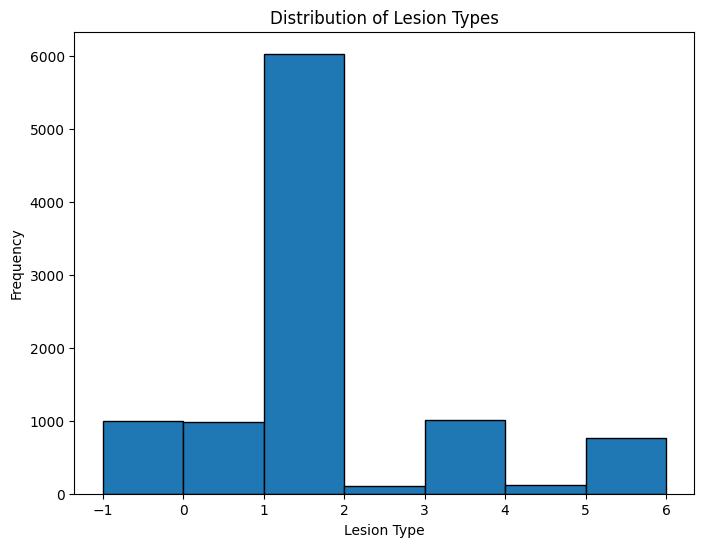

In [10]:
plt.figure(figsize=(8, 6))
plt.hist(df['lesion_type'], bins=7, edgecolor='black')
plt.xlabel('Lesion Type')
plt.ylabel('Frequency')
plt.title('Distribution of Lesion Types')
plt.show()

# Univariate Analysis

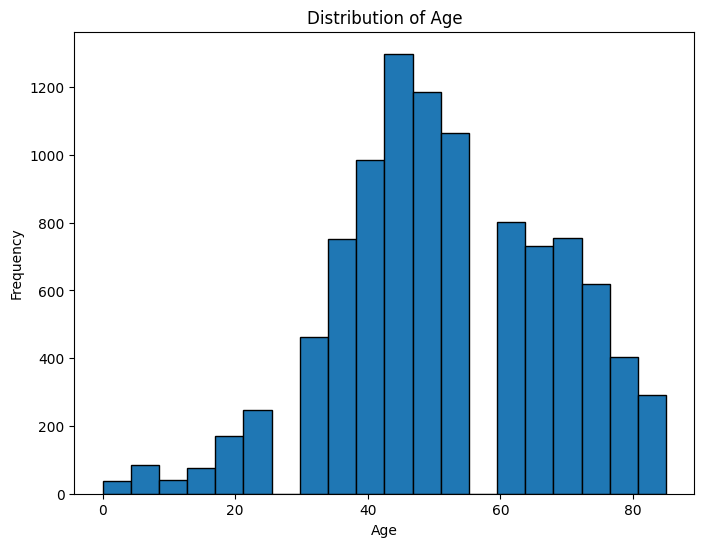

In [11]:
plt.figure(figsize=(8, 6))
plt.hist(df['age'], bins=20, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()

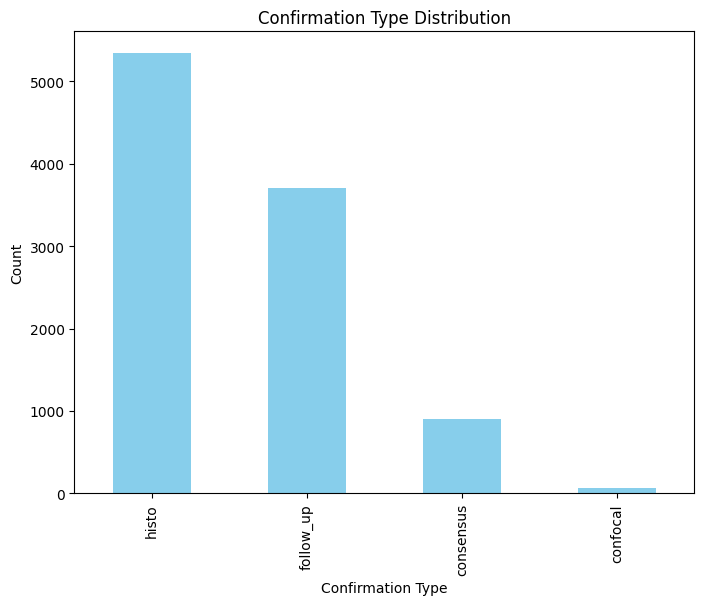

In [12]:
plt.figure(figsize=(8, 6))
df['confirmation'].value_counts().plot(kind='bar', color='skyblue')
plt.xlabel('Confirmation Type')
plt.ylabel('Count')
plt.title('Confirmation Type Distribution')
plt.show()

In [13]:
# Calculating percentage distribution
confirmation_percentage = df['confirmation'].value_counts(normalize=True) * 100

print("Confirmation Type Counts:")
print(df['confirmation'].value_counts())
print("\nConfirmation Type Percentage Distribution:")
print(confirmation_percentage)

Confirmation Type Counts:
confirmation
histo        5340
follow_up    3704
consensus     902
confocal       69
Name: count, dtype: int64

Confirmation Type Percentage Distribution:
confirmation
histo        53.320020
follow_up    36.984523
consensus     9.006490
confocal      0.688967
Name: proportion, dtype: float64


Text(0.5, 1.0, 'Gender of Patient')

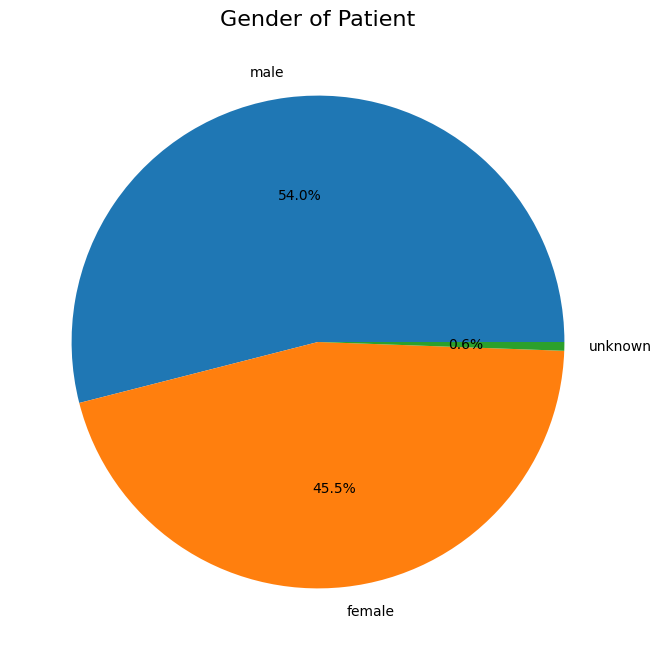

In [14]:
bar, ax = plt.subplots(figsize = (8,8))
plt.pie(df['sex'].value_counts(), labels = df['sex'].value_counts().index, autopct="%.1f%%")
plt.title('Gender of Patient', size=16)

In [15]:
sex_percentage = df['sex'].value_counts(normalize=True) * 100

print("Sex Counts:")
print(df['sex'].value_counts())
print("\nSex Percentage Distribution:")
print(sex_percentage)

Sex Counts:
sex
male       5406
female     4552
unknown      57
Name: count, dtype: int64

Sex Percentage Distribution:
sex
male       53.979031
female     45.451822
unknown     0.569146
Name: proportion, dtype: float64


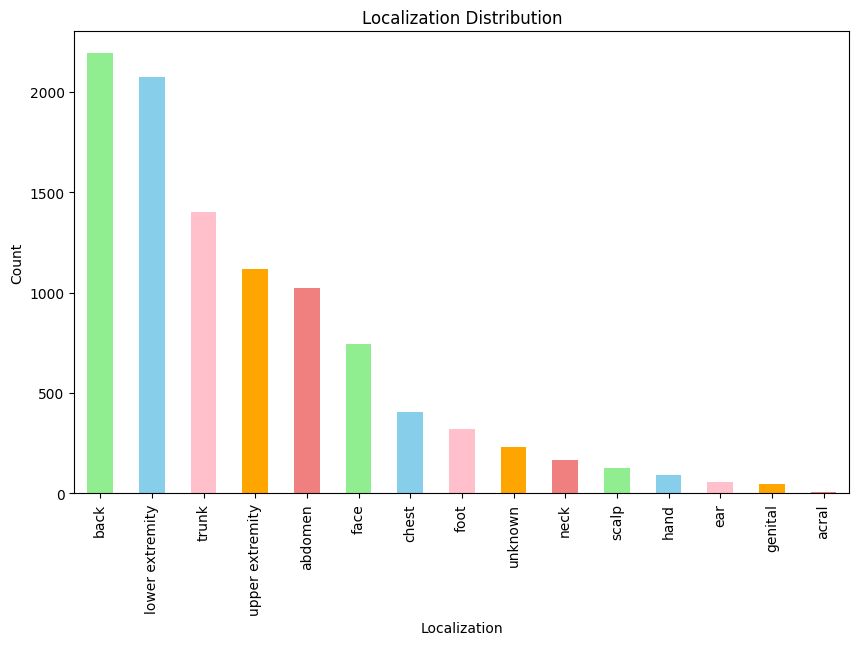

In [16]:
category_colors = ['lightgreen', 'skyblue', 'pink', 'orange', 'lightcoral']

plt.figure(figsize=(10, 6))
df['localization'].value_counts().plot(kind='bar', color=category_colors)
plt.xlabel('Localization')
plt.ylabel('Count')
plt.title('Localization Distribution')
plt.show()

In [17]:
localization_percentage = df['localization'].value_counts(normalize=True) * 100
print("Localization Counts:")
print(df['localization'].value_counts())
print("\nLocalization Percentage Distribution:")
print(localization_percentage)

Localization Counts:
localization
back               2192
lower extremity    2077
trunk              1404
upper extremity    1118
abdomen            1022
face                745
chest               407
foot                319
unknown             234
neck                168
scalp               128
hand                 90
ear                  56
genital              48
acral                 7
Name: count, dtype: int64

Localization Percentage Distribution:
localization
back               21.887169
lower extremity    20.738892
trunk              14.018972
upper extremity    11.163255
abdomen            10.204693
face                7.438842
chest               4.063904
foot                3.185222
unknown             2.336495
neck                1.677484
scalp               1.278083
hand                0.898652
ear                 0.559161
genital             0.479281
acral               0.069895
Name: proportion, dtype: float64


# Correlation Analysis

In [18]:
# Function for performing Chi-square test and displaying the results
def chi_square_test(df, col1, col2):
    crosstab = pd.crosstab(df[col1], df[col2])
    chi2, p, dof, ex = chi2_contingency(crosstab)
    print(f"\n{col1} and {col2}")
    print(f"Chi-square statistic: {chi2}, p-value: {p}")
    
# Correlations between attributes
print("Correlations:")
pairs = [('confirmation', 'lesion_type'), 
         ('sex', 'lesion_type'), 
         ('localization', 'lesion_type'), 
         (('confirmation', 'sex'), 'localization')]

for pair in pairs:
    if isinstance(pair[0], tuple):
        cross_tab = pd.crosstab([df[col] for col in pair[0]], df[pair[1]])
        chi2, p, dof, ex = chi2_contingency(cross_tab)
        print(f"\n{pair[0]} and {pair[1]}")
        print(f"Chi-square statistic: {chi2}, p-value: {p}")
    else:
        chi_square_test(df, *pair)

Correlations:

confirmation and lesion_type
Chi-square statistic: 4101.270254878973, p-value: 0.0

sex and lesion_type
Chi-square statistic: 107.08014205360861, p-value: 2.0563742019869162e-16

localization and lesion_type
Chi-square statistic: 2553.136892145003, p-value: 0.0

('confirmation', 'sex') and localization
Chi-square statistic: 5855.181097463961, p-value: 0.0


In [19]:
# Calculate the Pearson correlation coefficient
correlation_coefficient = df['lesion_type'].corr(df['age'], method='pearson')

print("Pearson correlation coefficient:", correlation_coefficient)

Pearson correlation coefficient: 0.20993547804631324
